# Data Cleaning and Preprocessing 

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
file_path = "Final_data.csv"
df = pd.read_csv(file_path)

# Assign proper column names based on the second row and remove irrelevant rows
df_cleaned = df.iloc[2:].reset_index(drop=True)
df_cleaned.columns = [
    "S.no.", "Volunteer", "Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
    "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz", "Speed_km_hr"
]

# Convert numerical columns to appropriate data types
num_cols = df_cleaned.columns[2:]  # Exclude S.no. and Volunteer
df_cleaned[num_cols] = df_cleaned[num_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_cleaned = df_cleaned.dropna().reset_index(drop=True)

# Save the cleaned dataset
df_cleaned.to_csv("Final_data_cleaned.csv", index=False)

# Normalize the data
features = ["Speed_km_hr", "Volunteer"]
targets = ["Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
           "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz"]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df_cleaned[features])
Y_scaled = scaler_Y.fit_transform(df_cleaned[targets])

# Prepare LSTM sequences
sequence_length = 10  # Using past 10 data points for prediction
X_sequences, Y_sequences = [], []

for i in range(len(df_cleaned) - sequence_length):
    X_sequences.append(X_scaled[i:i + sequence_length])
    Y_sequences.append(Y_scaled[i + sequence_length])  # Predict next point

X_sequences = np.array(X_sequences)
Y_sequences = np.array(Y_sequences)

# Split into training and testing sets
split_idx = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split_idx], X_sequences[split_idx:]
Y_train, Y_test = Y_sequences[:split_idx], Y_sequences[split_idx:]

print("Data cleaning and formatting completed. Ready for LSTM model.")


Data cleaning and formatting completed. Ready for LSTM model.


# LSTM Model 

Epoch 1/100


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


785/785 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - loss: 0.0134 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 2/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - loss: 0.0014 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 3/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.0010 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 4/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 8.1252e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 5/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - loss: 6.6783e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 6/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - loss: 6.2046e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 7/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - loss: 5.6501e-04 - val_loss: 8.7686e-04 - learning_rate: 0.0010
Epoch 8/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - loss: 5.1771e-04 - val_loss: 8.0334e-04 - learning_rate: 0.0010
Epoch 9/100
785/785 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - loss: 4.9693e-04 - val_

Model saved successfully!
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Mean Squared Error (MSE): 0.9577
Mean Absolute Error (MAE): 0.5033
R² Score: 0.9049


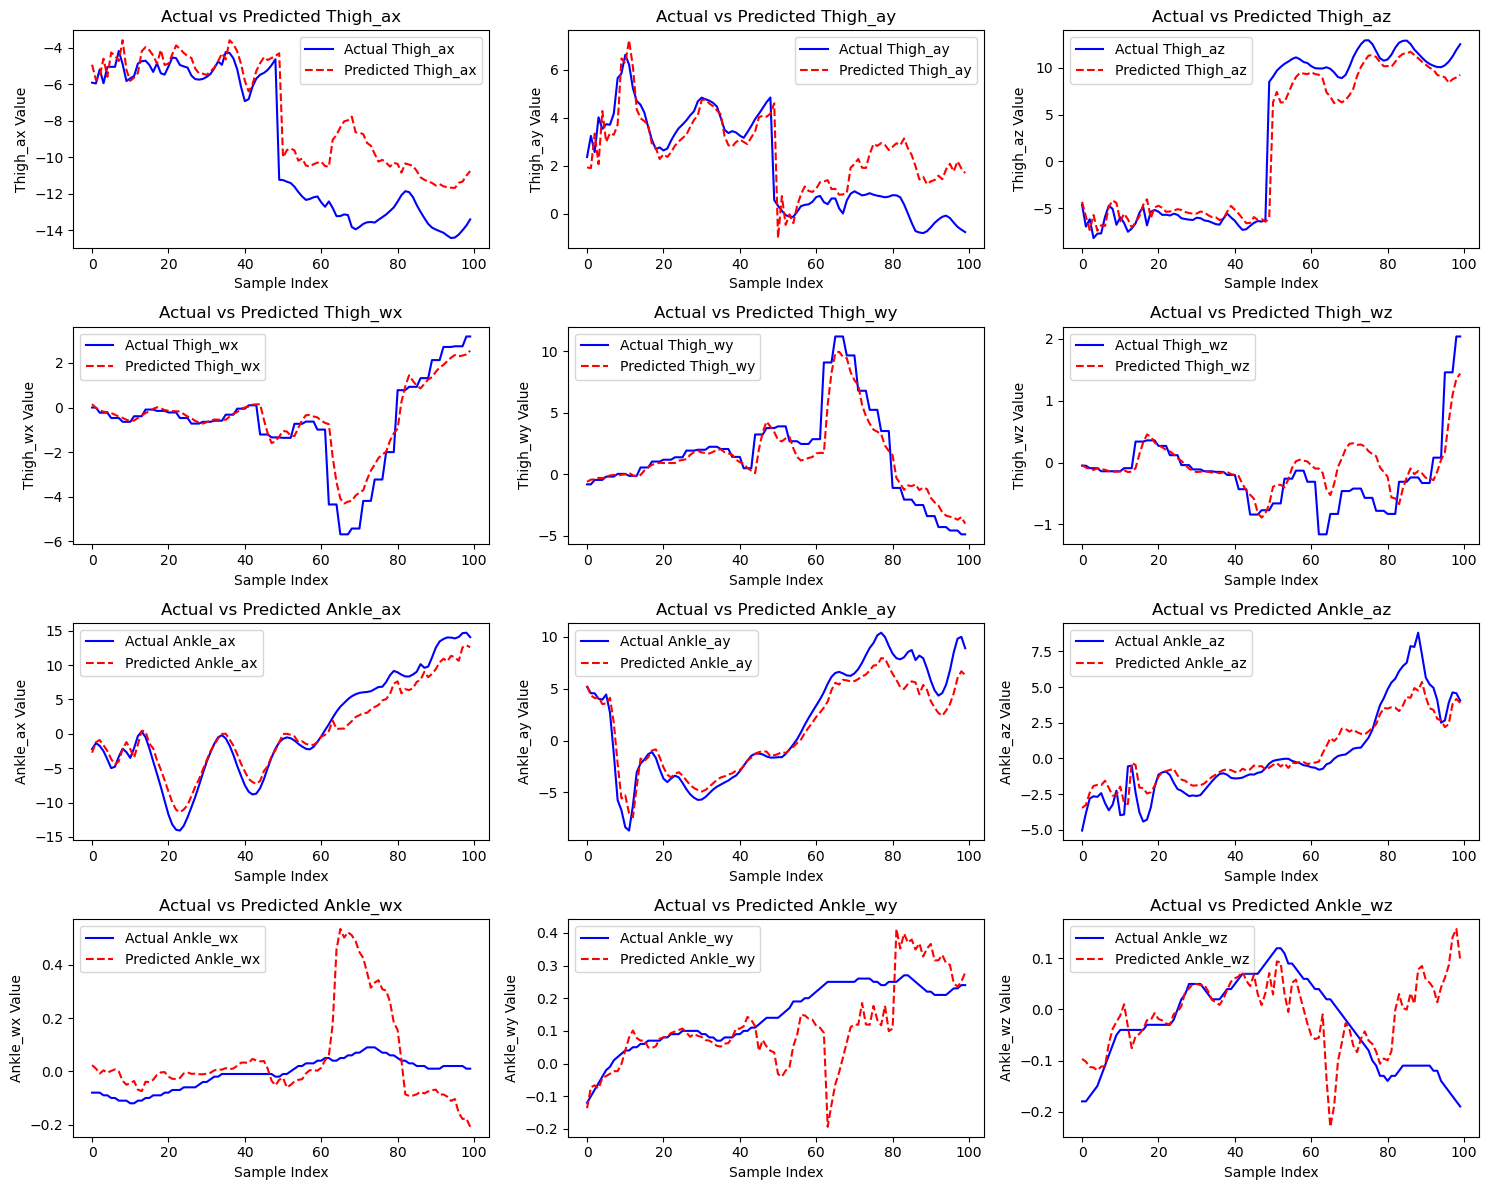

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Final_data_cleaned.csv"  # Update if needed
df = pd.read_csv(file_path)

# Selecting more features (independent variables) & targets (dependent variables)
features = ["Speed_km_hr", "Volunteer", 
            "Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
            "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz"]

targets = ["Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
           "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz"]

# Normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
Y_scaled = scaler_Y.fit_transform(df[targets])

# Define sequence length for LSTM (using past 30 timesteps to predict the next)
sequence_length = 30
X_sequences, Y_sequences = [], []

for i in range(len(df) - sequence_length):
    X_sequences.append(X_scaled[i:i + sequence_length])
    Y_sequences.append(Y_scaled[i + sequence_length])  # Predict the next point

X_sequences = np.array(X_sequences)
Y_sequences = np.array(Y_sequences)

# Splitting into training and testing sets (80% train, 20% test)
split_idx = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split_idx], X_sequences[split_idx:]
Y_train, Y_test = Y_sequences[:split_idx], Y_sequences[split_idx:]

# Define an improved LSTM model
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(12)  # 12 output values (gyroscope & accelerometer x, y, z)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Callbacks for learning rate scheduling & early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model for 100 epochs
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), 
                    verbose=1, callbacks=[lr_scheduler, early_stopping])

# Save the trained model
model.save("lstm_sensor_model.h5")
print("Model saved successfully!")

# Predict values on test set
Y_pred = model.predict(X_test)

# Inverse transform to get actual values
Y_test_actual = scaler_Y.inverse_transform(Y_test)
Y_pred_actual = scaler_Y.inverse_transform(Y_pred)

# Evaluate the model using regression metrics
mse = mean_squared_error(Y_test_actual, Y_pred_actual)
mae = mean_absolute_error(Y_test_actual, Y_pred_actual)
r2 = r2_score(Y_test_actual, Y_pred_actual)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values for one of the output variables (Thigh_ax)
plt.figure(figsize=(15, 12))

# Loop through all target variables
for i in range(len(targets)):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns (since we have 12 targets)
    plt.plot(Y_test_actual[:100, i], label=f"Actual {targets[i]}", color='blue')
    plt.plot(Y_pred_actual[:100, i], label=f"Predicted {targets[i]}", color='red', linestyle='dashed')
    plt.xlabel("Sample Index")
    plt.ylabel(f"{targets[i]} Value")
    plt.legend()
    plt.title(f"Actual vs Predicted {targets[i]}")

plt.tight_layout()
plt.show()



In [9]:
import tensorflow as tf

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("✅ GPU is available and ready for training!")
else:
    print("⚠ No GPU detected! Training will use CPU.")


Num GPUs Available: 0
⚠ No GPU detected! Training will use CPU.


In [7]:
!nvidia-smi

Thu Mar 27 19:40:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.27                 Driver Version: 552.27         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P3             10W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Check if GPU is available
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

# Load the cleaned dataset
file_path = "Final_data_cleaned.csv"  # Update if needed
df = pd.read_csv(file_path)

# Selecting features & targets
features = ["Speed_km_hr", "Volunteer", 
            "Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
            "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz"]

targets = ["Thigh_ax", "Thigh_ay", "Thigh_az", "Thigh_wx", "Thigh_wy", "Thigh_wz",
           "Ankle_ax", "Ankle_ay", "Ankle_az", "Ankle_wx", "Ankle_wy", "Ankle_wz"]

# Normalize the dataset
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[features])
Y_scaled = scaler_Y.fit_transform(df[targets])

# Define sequence length for LSTM
sequence_length = 30
X_sequences, Y_sequences = [], []

for i in range(len(df) - sequence_length):
    X_sequences.append(X_scaled[i:i + sequence_length])
    Y_sequences.append(Y_scaled[i + sequence_length])  

X_sequences = np.array(X_sequences)
Y_sequences = np.array(Y_sequences)

# Split into training and testing sets (80% train, 20% test)
split_idx = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split_idx], X_sequences[split_idx:]
Y_train, Y_test = Y_sequences[:split_idx], Y_sequences[split_idx:]

# Define an improved LSTM model with GPU acceleration
with tf.device('/GPU:0'):
    model = Sequential([
        LSTM(256, return_sequences=True, input_shape=(sequence_length, len(features))),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(12)  # 12 output values (gyroscope & accelerometer x, y, z)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

# Callbacks for learning rate scheduling & early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model using GPU
with tf.device('/GPU:0'):
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), 
                        verbose=1, callbacks=[lr_scheduler, early_stopping])

# Save the trained model
model.save("lstm_sensor_model.h5")
print("Model saved successfully!")

# Predict values on test set
Y_pred = model.predict(X_test)

# Inverse transform to get actual values
Y_test_actual = scaler_Y.inverse_transform(Y_test)
Y_pred_actual = scaler_Y.inverse_transform(Y_pred)

# Evaluate the model using regression metrics
mse = mean_squared_error(Y_test_actual, Y_pred_actual)
mae = mean_absolute_error(Y_test_actual, Y_pred_actual)
r2 = r2_score(Y_test_actual, Y_pred_actual)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values for all target variables
plt.figure(figsize=(15, 12))

# Loop through all target variables
for i in range(len(targets)):
    plt.subplot(4, 3, i + 1)  # 4 rows, 3 columns (since we have 12 targets)
    plt.plot(Y_test_actual[:100, i], label=f"Actual {targets[i]}", color='blue')
    plt.plot(Y_pred_actual[:100, i], label=f"Predicted {targets[i]}", color='red', linestyle='dashed')
    plt.xlabel("Sample Index")
    plt.ylabel(f"{targets[i]} Value")
    plt.legend()
    plt.title(f"Actual vs Predicted {targets[i]}")

plt.tight_layout()
plt.show()
